# Sales Prediction 


For all documents files datasets, and history of project visit : https://github.com/MichalI495002/Personal-Challenge.git

Data set contain sales of various (~1000) protective gear products from 2019 to mid-September of 2023

Our challenge is to match the most important external factors (e.g. Economic Factors (e.g. Inflation)) to see and use relation between external factors and sales for future prediction, thanks to connecting external factors with our data we can see influence of external variables on our sales and predict future behavior.

Our task it to create model which is going to be able to predict future sales based on inputted data and selected features  

*Due to anonymization of data let's name our company "XYZ" for easier descriptions*

# Read data 

Here we are going to read data from file for analyzation

In [1566]:
import pandas as pd
import seaborn as sns

# Read the CSV file
data = pd.read_csv('../Datasets/Sales Data/Sales Data 2019-2023.csv')

# Display the first few rows of the data
print(data.head())

      Index                                               Name  \
0   ZB5K005                    MAINZ safety glasses, clear uni   
1   ZB5K003             ALB protective goggles transparent uni   
2   ZB5K186                        ALF baseball cap, black uni   
3   ZB5K152   DALKE half mask with FFP2 valve light gray un...   
4   ZB5K007                    MAINZ tinted uni safety glasses   

  Z_Classification                Subgroup_2             Subgroup_3  \
0                A   EYE AND FACE PROTECTION                GLASSES   
1                B   EYE AND FACE PROTECTION                GLASSES   
2                B           BODY PROTECTION   CLOTHING ACCESSORIES   
3                B    RESPIRATORY PROTECTION             HALF MASKS   
4                B   EYE AND FACE PROTECTION                GLASSES   

                  Subgroup_4  2019-01  2019-02  2019-03  2019-04  ...  \
0   MAINZ PROTECTIVE GLASSES        0        0        0        0  ...   
1         ALB SAFETY GOGGLES  

Put data in data frame

In [1567]:
df = pd.DataFrame(data)
df

,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount
0,ZB5K005,"MAINZ safety glasses, clear uni",A,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,1764,931,2813,2404,2978,10925,632,340,75,48532
1,ZB5K003,ALB protective goggles transparent uni,B,EYE AND FACE PROTECTION,GLASSES,ALB SAFETY GOGGLES,122,140,810,274,...,250,566,744,504,641,1393,572,672,75,30408
2,ZB5K186,"ALF baseball cap, black uni",B,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,149,303,927,1298,2143,1047,1112,549,92,29872
3,ZB5K152,DALKE half mask with FFP2 valve light gray un...,B,RESPIRATORY PROTECTION,HALF MASKS,NaN,315,350,879,287,...,27,177,421,61,477,608,591,254,164,28601
4,ZB5K007,MAINZ tinted uni safety glasses,B,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,70,172,1542,757,1396,6058,572,291,63,22620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,ZB5K355-1-3XL,EMS protective trousers jeans blue 3XL (58),A,BODY PROTECTION,PROTECTIVE CLOTHING,PROTECTIVE TROUSERS,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
1027,ZB5K474-M,ELZ yellow winter hat uni MARKETY,NaN,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1028,ZB5K516-48,ZORGE safety shoes S3 SRC black 48,N,LEG PROTECTION,SAFE SHOES,SHOES,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1029,ZB5K516-47,ZORGE safety shoes S3 SRC black 47,N,LEG PROTECTION,SAFE SHOES,SHOES,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


We create another data frame without last row to create histogram

We delete last row because it continues sums of columns and it if we would leave it histogram would show different not reliable data 

array([[<Axes: title={'center': 'total amount'}>]], dtype=object)

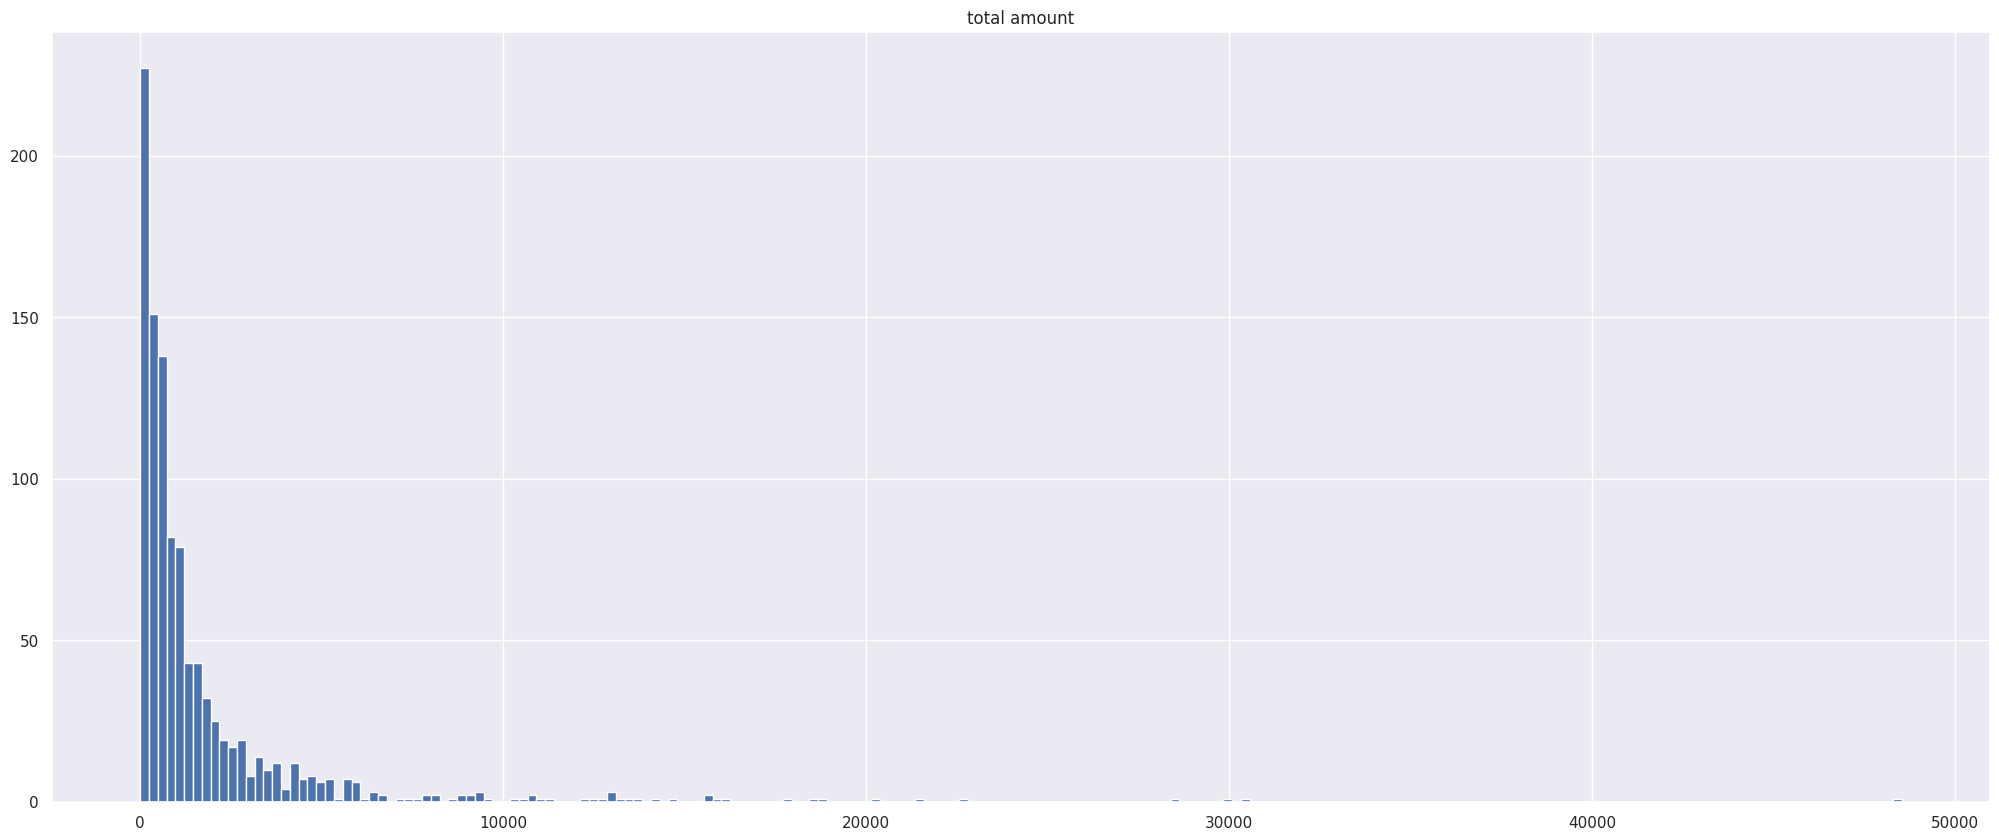

In [1568]:
df2 = df.head(df.shape[0] - 1)

df2.hist(column="total amount", bins=200, figsize=(25,10),density=0)

# We used "bins=200" becouse of big amount of products, we need more detailed histogram to show correct trend

We can see on histogram that most products sold less than 1000 pieces per product 

Let's now generate plot to see trend in sales

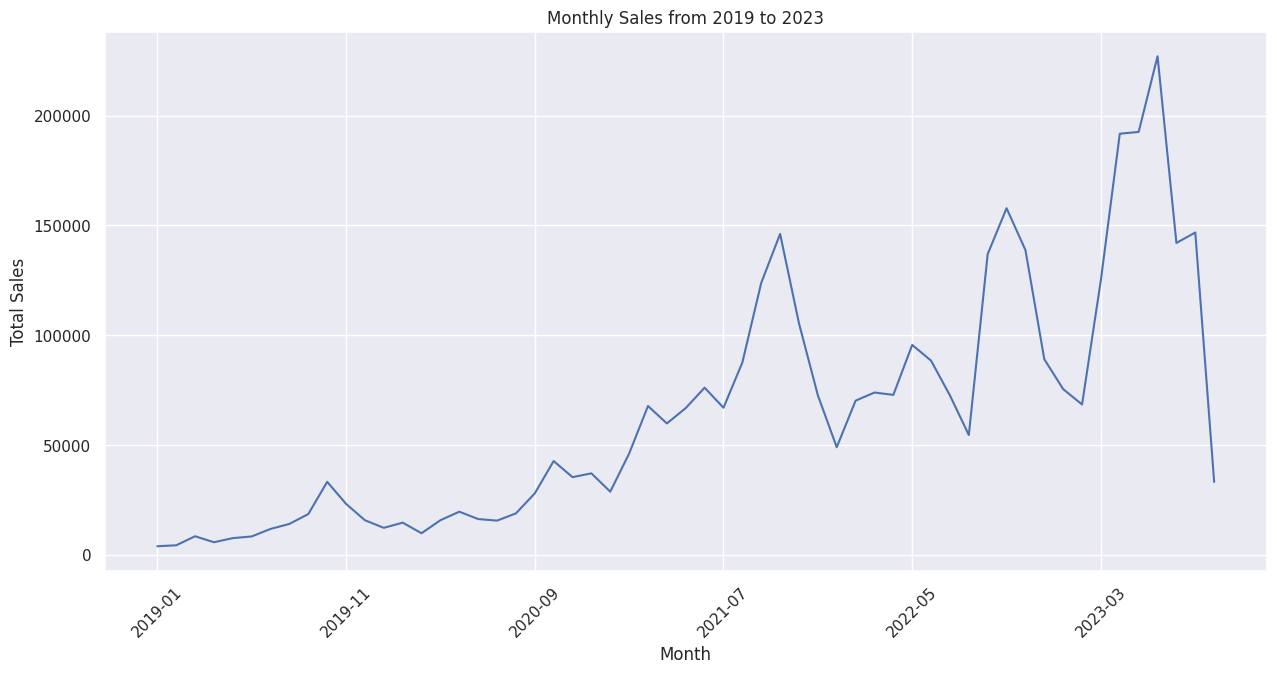

In [1569]:
# Extract monthly columns
monthly_columns = df.columns[6:-1]  # Exclude the "total amount" column

# Sum the sales for each month
monthly_sales = df[monthly_columns].sum()

ax = monthly_sales.plot(figsize=(15, 7), grid=True, title="Monthly Sales from 2019 to 2023", ylabel="Total Sales")
ax.set_xlabel("Month")
ax.tick_params(axis='x', rotation=45)

Here we can see trend of sales, the last month (September 2023) has unexpectedly low sales because data comes from beginning of September

## External Factors

When it comes to analyzation of sales data about amount of sales is not enough, because we don't have any variables we can correlate our sales to. 
Let's now focus of Economic factors which are one of the most important factors when it comes to sales.
Because company "XYZ" is based in Poland, our external factors data should be accordingly to Poland.

When it comes to sales of protective gear we can distinguish a couple of most important economic factors which have influence on sales 


### Inflation

One of the main Economic factors is Inflation, especially nowadays Poland and whole Europe experiencing high inflation rates consequently increase of prices and costs of living, let's read monthly inflation data and show it on plot for analyze.

In [1570]:
inflation_data = pd.read_csv('../Datasets/Inflation data/Inflation Poland.csv')

print(inflation_data.head())

   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0    100.7    101.2    101.7    102.2    102.4    102.6    102.9    102.9   

   2019-09  2019-10  ...  2022-12  2023-01  2023-02  2023-03  2023-04  \
0    102.6    102.5  ...    116.6    116.6    118.4    116.1    114.7   

   2023-05  2023-06  2023-07  2023-08  2023-09  
0      113    111.5    110.8    110.1      NaN  

[1 rows x 57 columns]


In [1571]:
df_inflation = pd.DataFrame(inflation_data)
df_inflation

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,100.7,101.2,101.7,102.2,102.4,102.6,102.9,102.9,102.6,102.5,...,116.6,116.6,118.4,116.1,114.7,113,111.5,110.8,110.1,NaN


As we can see we only have data till August of this year

Text(0, 0.5, 'Inflation Value')

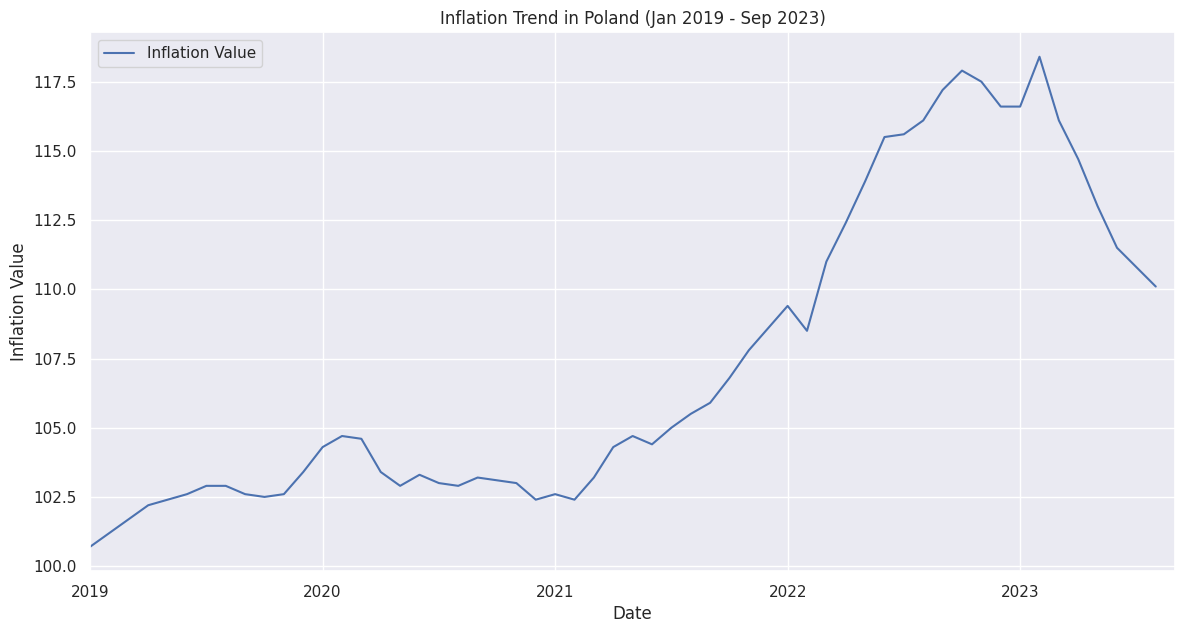

In [1572]:
# Reshape the dataframe to long format
df_long = df_inflation.melt(var_name='Date', value_name='Inflation Value')

# Convert the 'Date' column to datetime format for better plotting
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Plot the graph using pandas plotting functionality
ax = df_long.plot(x='Date', y='Inflation Value', figsize=(14, 7), grid=True, title='Inflation Trend in Poland (Jan 2019 - Sep 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Value')

As we can see inflation peek was in 2023, also Y axis has values from 100 till about 120, the reason of that its value is calculated based on inflation rate from previous year 

### Unemployment rate

Unemployment rate is very influential on whole economy of country and on economic growth including new investments and whole service sector consequently sales for individual or companies can be lower with higher unemployment rate.

Let's read data and show it on graph

In [1573]:
unemployment_data = pd.read_csv('../Datasets/Unemployment rate/Unemployment rate Poland.csv')

print(unemployment_data.head())

   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0      6.1      6.1      5.9      5.6      5.4      5.3      5.2      5.2   

   2019-09  2019-10  ...  2022-12  2023-01  2023-02  2023-03  2023-04  \
0      5.1        5  ...      5.2      5.5      5.5      5.4      5.2   

   2023-05  2023-06  2023-07  2023-08  2023-09  
0      5.1        5        5      NaN      NaN  

[1 rows x 57 columns]


In [1574]:
df_unemployment = pd.DataFrame(unemployment_data)
df_unemployment

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,6.1,6.1,5.9,5.6,5.4,5.3,5.2,5.2,5.1,5,...,5.2,5.5,5.5,5.4,5.2,5.1,5,5,NaN,NaN


We can see that we only have data till July of this year

Text(0, 0.5, 'Unemployment Value')

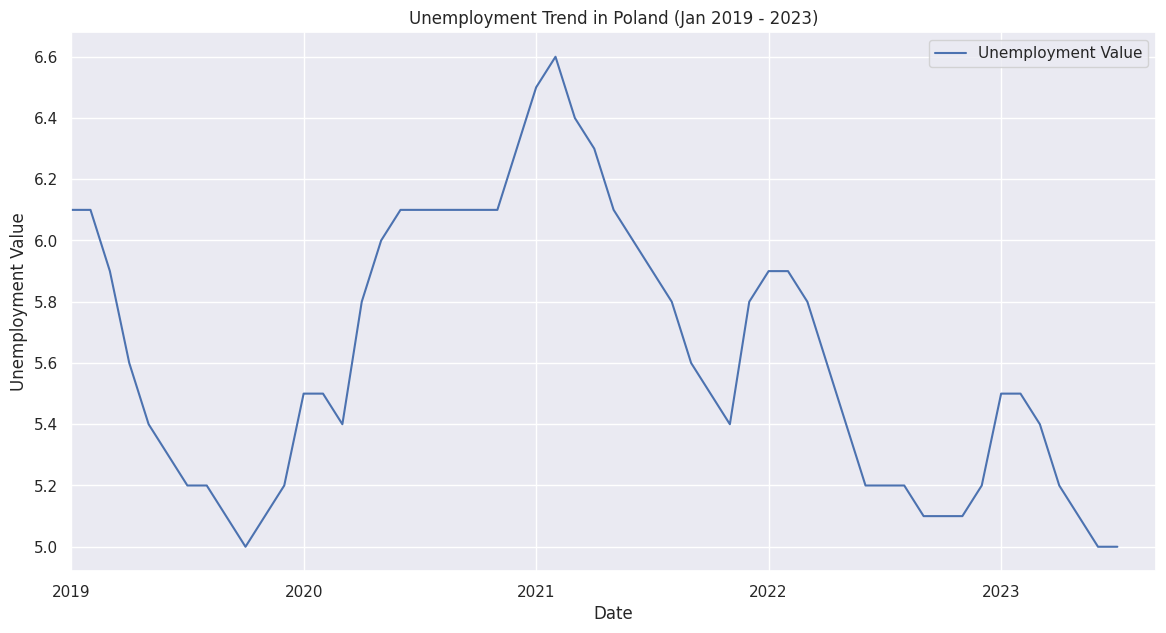

In [1575]:
# Reshape the dataframe to long format
data_transposed = df_unemployment.melt(var_name='Date', value_name='Unemployment Value')

# Convert the 'Date' column to datetime format for better plotting
data_transposed['Date'] = pd.to_datetime(df_long['Date'])

# Plot the graph using pandas plotting functionality
ax = data_transposed.plot(x='Date', y='Unemployment Value', figsize=(14, 7), grid=True, title='Unemployment Trend in Poland (Jan 2019 - 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Value')



### Temperature Data

Temperature Data is relevant in this case because some products are seasonal for e.g. outdoors protective gear can have additional thermal isolation, It's not as important as external economic factors but still relevant for our model. 

Let's read the data and show it on the graph


In [1576]:
temparteure_data = pd.read_csv('../Datasets/Temperature data/aggregatedDataTemperature.csv', encoding="ISO-8859-1")
print(temparteure_data.head())

   Year  Month  Avg Temp [°C]
0  2019      1      -3.069118
1  2019      2       1.885075
2  2019      3       4.737879
3  2019      4       8.734848
4  2019      5      11.668182


In [1577]:
df_temparteure = pd.DataFrame(temparteure_data)
df_temparteure

,Year,Month,Avg Temp [°C]
0,2019,1,-3.069118
1,2019,2,1.885075
2,2019,3,4.737879
3,2019,4,8.734848
4,2019,5,11.668182
5,2019,6,20.843750
6,2019,7,18.079687
7,2019,8,18.996923
8,2019,9,13.167692
9,2019,10,9.652308


<module 'pandas.plotting' from '/home/michal/.local/lib/python3.10/site-packages/pandas/plotting/__init__.py'>

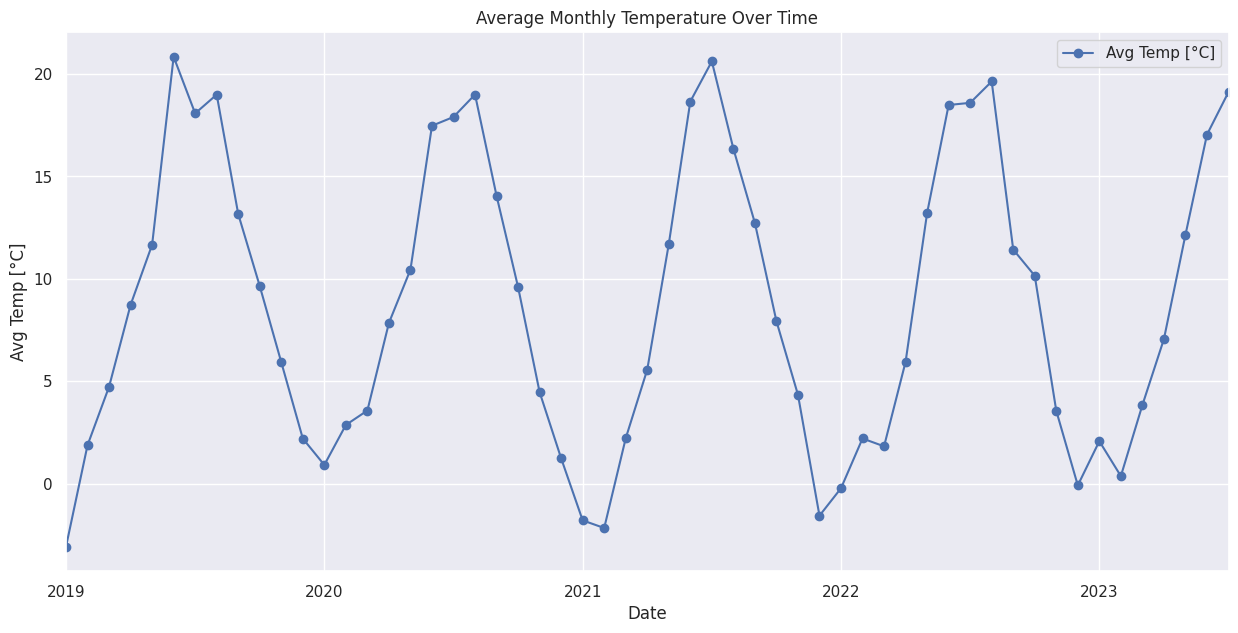

In [1578]:
# Create a new column 'Date' combining the Year and Month columns for plotting
df_temparteure['Date'] = pd.to_datetime(df_temparteure[['Year', 'Month']].assign(DAY=1))

# Plotting the data using only pandas' built-in plotting capabilities
df_temparteure.plot(x='Date', y='Avg Temp [°C]', figsize=(15, 7), marker='o', linestyle='-', title='Average Monthly Temperature Over Time', grid=True, xlabel='Date', ylabel='Avg Temp [°C]')

# Display the plot
pd.plotting


We can clearly see natural cycle of the year

### Analyzation 
Lets now draw all data on one graph to see how they are looking with each other and if we can see any pattern, we have to standardize data to draw them on one graph

In [1579]:
df = pd.read_csv('../Datasets/Aggregated data/Aggregated.csv')
df

,,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
0,Sales,1967.000000,2184.000000,4238.000000,2878.000000,3815.000000,4197.00000,5914.000000,7052.000000,9299.000000,...,78917.000000,69386.000000,44531.000000,37725.000000,34223.000000,62632.000000,95872.000000,96280.00,113509.000000,70998.000000
1,Inflation,100.700000,101.200000,101.700000,102.200000,102.400000,102.60000,102.900000,102.900000,102.600000,...,117.900000,117.500000,116.600000,116.600000,118.400000,116.100000,114.700000,113.00,111.500000,110.800000
2,Unemployment,6.100000,6.100000,5.900000,5.600000,5.400000,5.30000,5.200000,5.200000,5.100000,...,5.100000,5.100000,5.200000,5.500000,5.500000,5.400000,5.200000,5.10,5.000000,5.000000
3,Temperature,-3.069118,1.885075,4.737879,8.734848,11.668182,20.84375,18.079687,18.996923,13.167692,...,10.156364,3.565385,-0.073077,2.082692,0.378846,3.844231,7.065385,12.15,17.042308,19.121569


### Scaling
Because each data is in different format, we scale it to show it on graph for clear representation

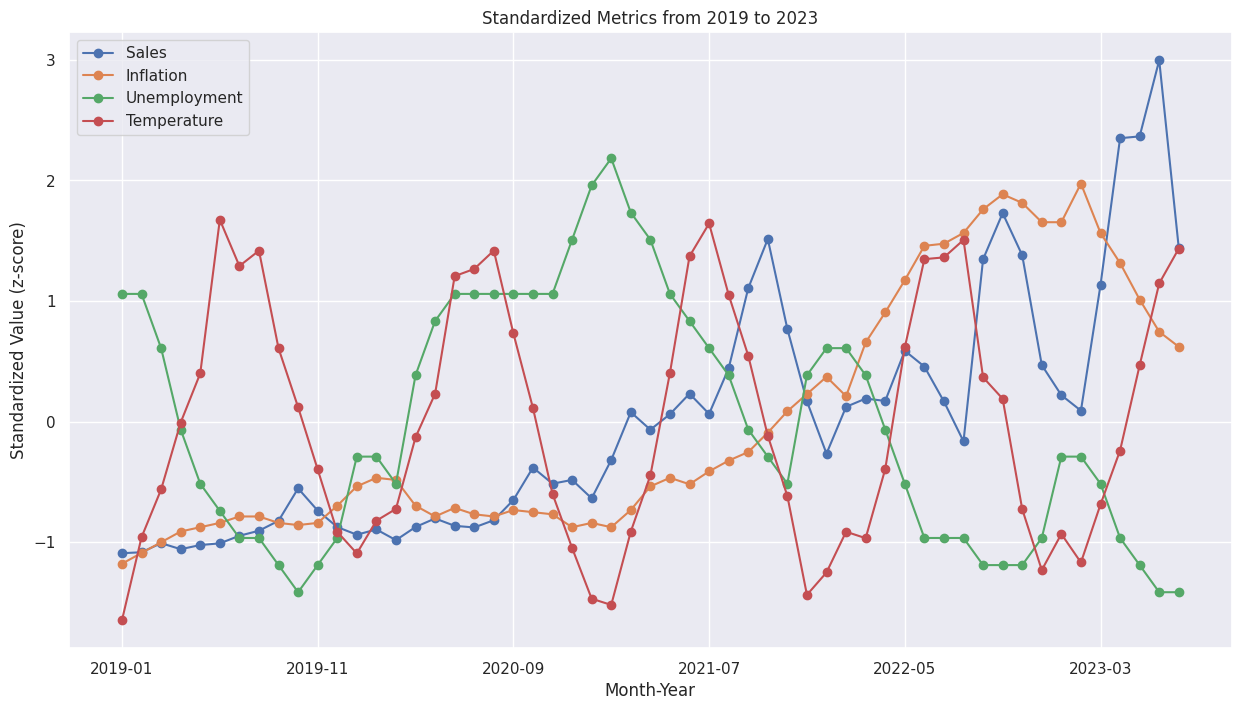

In [1580]:
# Transpose the dataframe for easier plotting
df_transposed = df.set_index(df.columns[0]).transpose()

# Standardize the data using pandas methods directly
df_standardized_pandas = df_transposed.apply(lambda x: (x - x.mean()) / x.std())

# Plot the standardized data using pandas plotting
ax = df_standardized_pandas.plot(figsize=(15, 8), marker='o', grid=True)
ax.set_title("Standardized Metrics from 2019 to 2023")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Standardized Value (z-score)")
ax.legend(loc="upper left")


We can see pattern of all data on graph e.g. we can see that when unemployment was high sales were low

Let's now draw heat map to see the most important features 

Text(0.5, 1.0, 'Correlation Heatmap')

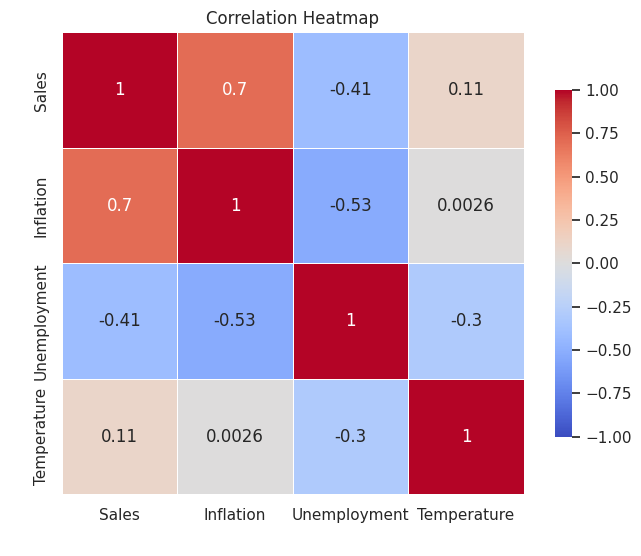

In [1581]:
correlation_matrix = df_transposed.corr()
# Visualize the correlation heatmap using seaborn
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": 0.75}).set_title('Correlation Heatmap')
    

We can see that coloration between sales and inflation is high, and between sales and unemployment we also see coloration, unfortunately there is no big coloration between sales and temperature, even though we expected coloration caused by seasonal products

# Building Model
Here we are going to consider, choose and build the best machine learning solution for sales prediction 

### Transpose Data
Because our aggregated data has dates in columns, and values in rows we are going to transpose our data for easier manipulation, it's going to be useful despite kind of chosen algorithm

The code snippet below outlines the process of data transformation and saving it back to CSV format in Python, using pandas and the `sklearn.model_selection` and `sklearn.metrics` modules for potential later use in model training and evaluation.

1. Functions `train_test_split` for splitting the dataset and performance metrics like `mean_squared_error` and `r2_score` for model evaluation are imported but not used directly in the snippet.
2. The original DataFrame `df` is transposed to switch rows with columns, which can be a necessary step depending on the structure of the data and the desired format for modeling.
3. The new column names for the `transposed_data` DataFrame are set based on its first row, which typically contains the original column headers.
4. The first row, now redundant after renaming the columns, is dropped from `transposed_data`.
5. The DataFrame index is reset to ensure it starts from 0, and the index column is renamed to 'Date', which is often required for time series data to identify the timeline.
6. The `head` method is called to display the first few rows of the transformed DataFrame for a quick inspection.
7. Finally, the `transposed_data` DataFrame is saved to a CSV file named "DataSet.csv" using ISO-8859-1 encoding to accommodate special characters.

This sequence of data manipulation steps is essential for preparing the dataset in a structure that is suitable for further analysis or modeling.


In [1582]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Transpose the data
transposed_data = df.transpose()

# Rename the columns based on the first row
transposed_data.columns = transposed_data.iloc[0]
transposed_data = transposed_data.drop(transposed_data.index[0])

# Reset index
transposed_data.reset_index(inplace=True)
transposed_data.rename(columns={'index': 'Date'}, inplace=True)

transposed_data.head()

transposed_data.to_csv("DataSet.csv", encoding="ISO-8859-1")

The code snippet demonstrates the steps for converting date data to a datetime format and checking for missing values in a DataFrame using Python's pandas library.

1. The 'Date' column of the `transposed_data` DataFrame is converted to datetime objects using the `pd.to_datetime` method. This conversion is essential for time series analysis as it ensures that dates are in a consistent format that can be understood by time series modeling tools.
2. The `isnull` method followed by the `sum` function is applied to `transposed_data` to count the number of missing values in each column. This is a crucial step for data cleaning and quality assurance before any analysis or modeling.
3. The resulting series `missing_values`, which contains the count of missing values per column, is displayed. Understanding the presence and extent of missing data helps in determining the necessary preprocessing steps, such as imputation or removal of missing data points.

By executing these steps, one can ensure that the dataset is ready and reliable for subsequent stages of time series analysis or modeling, with date information correctly formatted and missing values identified.


In [1583]:
# Convert the 'Date' column to datetime
transposed_data['Date'] = pd.to_datetime(transposed_data['Date'])

# Check for missing values
missing_values = transposed_data.isnull().sum()

missing_values


 
Date            0
Sales           0
Inflation       0
Unemployment    0
Temperature     0
dtype: int64

The code snippet below illustrates the process of feature engineering on time series data, specifically by enriching the dataset with time-related attributes derived from the 'Date' column.

1. A new column 'Year' is created in the `transposed_data` DataFrame by extracting the year from each date in the 'Date' column using the `dt.year` attribute of pandas.
2. Similarly, a 'Month' column is added by extracting the month from each date in the 'Date' column using the `dt.month` attribute.
3. After introducing these new time-related features, the `head` method is called to display the first few rows of the `transposed_data` DataFrame, providing a preview of the updated dataset with the newly engineered features.

These steps are a common practice in time series analysis and machine learning, where additional features like 'Year' and 'Month' can provide valuable information to help models capture seasonal trends and patterns more effectively.


In [1584]:
# Feature Engineering: Extract month and year from 'Date'
transposed_data['Year'] = transposed_data['Date'].dt.year
transposed_data['Month'] = transposed_data['Date'].dt.month

# Now that we have added new features, let's look at the first few rows of the updated dataframe
transposed_data.head()


,Date,Sales,Inflation,Unemployment,Temperature,Year,Month
0,2019-01-01,1967.0,100.7,6.1,-3.069118,2019,1
1,2019-02-01,2184.0,101.2,6.1,1.885075,2019,2
2,2019-03-01,4238.0,101.7,5.9,4.737879,2019,3
3,2019-04-01,2878.0,102.2,5.6,8.734848,2019,4
4,2019-05-01,3815.0,102.4,5.4,11.668182,2019,5


# Splitting Data

First, we need to split data in to two sets, the train set and test set for algorithm to learn form train set and its test comparing to test set


The code snippet demonstrates the preparation and splitting of a dataset into training and testing sets for machine learning in Python, utilizing functionalities from the `sklearn.model_selection` module.

1. The `train_test_split` function is imported, which is a utility for dividing datasets into train and test subsets.
2. Features `X` and the target `y` are defined, with `X` being all columns except 'Date' and 'Sales', and `y` being the 'Sales' column converted to numeric.
3. The `train_test_split` function is then called with a `test_size` of 0.2 and a `random_state` of 42, ensuring that 20% of the data is used as a test set and the split is reproducible.
4. The resulting split provides `X_train` and `y_train` for model training, and `X_test` and `y_test` for model testing, with their respective shapes being outputted to verify the split.

By following these steps, the dataset is ready for the next stages of machine learning, which include model training and evaluation.


In [1585]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = transposed_data.drop(columns=['Date', 'Sales'])  # Drop the 'Sales' and 'Date' columns for features
y = pd.to_numeric(transposed_data['Sales']) # 'Sales' is the target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((44, 5), (11, 5), (44,), (11,))

## Linear Regression

Linear regression is used for time series data to discern and quantify the linear trend over time, offering a straightforward way to predict future values. Its simplicity ensures computational efficiency and interpretability. Given these benefits, we will employ linear regression to predict future sales.

This code snippet below details the training and evaluation process for a Linear Regression model using the scikit-learn library. The process includes:

1. Initializing the Linear Regression model.
2. Fitting the model with training data.
3. Predicting sales on test data.
4. Calculating evaluation metrics: MSE, MAE, RMSE, and R².

The comments provided in the code offer a straightforward guide through each step, ensuring clarity in the model's application for sales prediction.


In [1586]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_regressor.predict(X_test)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse)
r2_lr = r2_score(y_test, y_pred)

# Assemble the error metrics
error_metrics_lr= {
    'Mean Absolute Error (MAE)': mae_lr,
    'Mean Squared Error (MSE)': mse_lr,
    'Root Mean Squared Error (RMSE)': rmse_lr,
    'R-squared (R²)': r2_lr
}

error_metrics_dt


{'Mean Absolute Error (MAE)': 9046.545454545454,
 'Mean Squared Error (MSE)': 159064237.63636363,
 'Root Mean Squared Error (RMSE)': 12612.067143666958,
 'R-squared (R²)': 0.7779069819700368}

The code snippet below performs the following operations:

1. Generates predictions for the test data using the trained Linear Regression model.
2. Constructs a DataFrame to compare the true values against the predicted values.
3. Calculates the prediction error as the absolute difference between true and predicted values, converting the error to an integer type.
4. Resets the index of the DataFrame for a clean presentation.

This organized structure allows for an easy assessment of the model's prediction accuracy on the test data.

In [1587]:
predictions = linear_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"].astype(int))
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

,truth,prediction,error
0,43793.0,39470.619021,4322
1,4197.0,6366.150671,2169
2,61916.0,44429.212176,17486
3,7341.0,13631.979687,6290
4,9438.0,16116.786253,6678
5,34223.0,56021.305611,21798
6,44196.0,52085.740992,7889
7,33877.0,22792.078456,11084
8,27274.0,54661.912323,27387
9,6155.0,12512.868291,6357


The given code block below imports necessary libraries and performs the following tasks:

1. Calculates the Maximum Error (Max Error) between the actual and predicted values, and then applies the ceiling function to round it up to the nearest integer. This metric provides insight into the worst-case error in the predictions.
2. Computes the Mean Squared Error (MSE) and then the Root Mean Squared Error (RMSE), also rounding it up to the nearest integer. The RMSE gives a sense of the magnitude of error across all predictions.

These metrics are printed out, giving a quick evaluation of the model's performance on the test data in terms of its prediction errors.


In [1588]:
import io, math
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 27388
Root Mean Squared Error: 14060


The code snippet below is designed to visually compare the actual and predicted sales figures:

1. It initializes a DataFrame that juxtaposes the actual sales (`y_test`) with the predicted values (`y_pred`).
2. The DataFrame is then sorted by its index to ensure the alignment of data points.
3. A matplotlib figure is created with a size of 14x7 inches for clear visualization.
4. The actual sales are plotted as a blue line, and the predicted sales are plotted as a dashed red line.
5. The plot is titled 'Actual vs Predicted Sales' and includes labels for both the x-axis (Index) and the y-axis (Sales).
6. A legend is added to differentiate between the actual and predicted lines.
7. The plot is displayed with `plt.show()`.

This visualization provides an intuitive comparison of the model's predictions against the actual sales data.

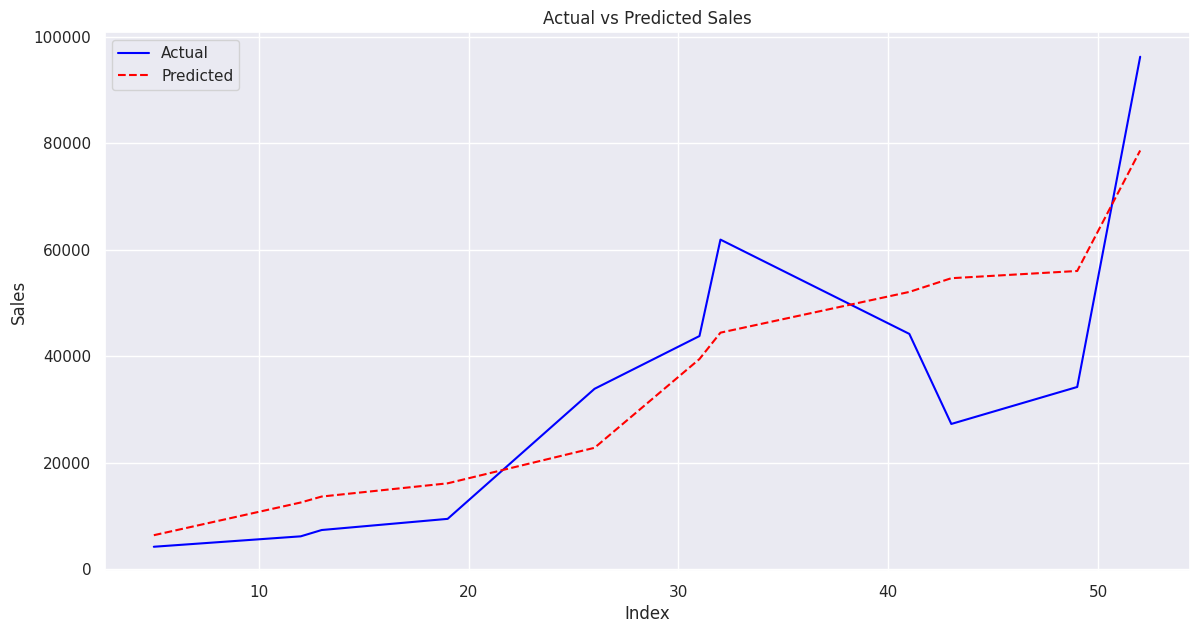

In [1589]:
# Creating a DataFrame to align the predictions with the actual sales
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df = comparison_df.sort_index()  # Sort by index to align the predictions correctly

plt.figure(figsize=(14, 7))

# Actual values in blue
plt.plot(comparison_df.index, comparison_df['Actual'], color="blue", label="Actual")

# Predicted values in red
plt.plot(comparison_df.index, comparison_df['Predicted'], color="red", label="Predicted", linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot visualizes the actual vs. predicted sales, with the actual sales depicted in blue and the predicted in red dashes. The degree of overlap between the two lines indicates the model's prediction accuracy, with a closer overlap representing higher accuracy.

The given code snippet below creates a visualization using seaborn, a Python data visualization library.

1. `regplot` is called to generate a scatter plot with a linear regression line.
2. Inputs for the plot are the flattened arrays of actual (`y_test`) and predicted (`predictions`) prices.
3. The regression line is set to appear in red.
4. Axis labels are added for clarity: "predicted price" on the x-axis and "true price" on the y-axis.

This visualization helps in assessing the accuracy of a regression model by comparing predicted values against actual values.


<Axes: xlabel='predicted price', ylabel='true price'>

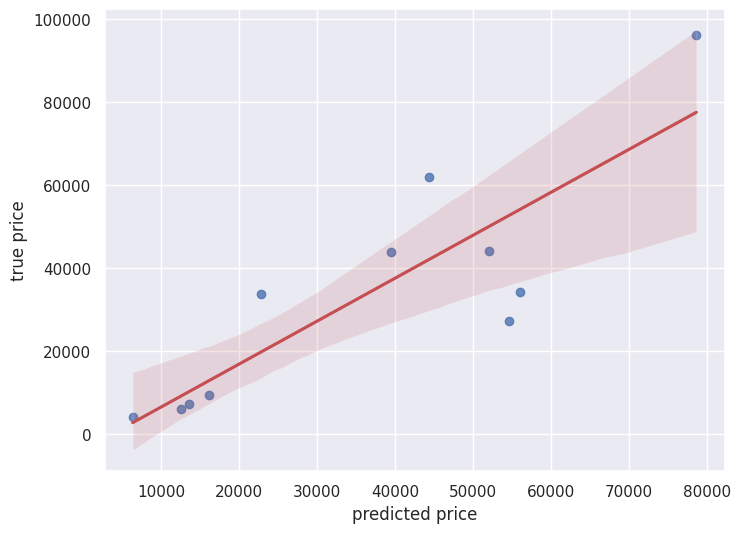

In [1590]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted price")
plot.set_ylabel("true price")
plot

The regression plot shows the correlation between predicted and actual sales. The proximity of the data points to the red line, which represents the best fit, indicates prediction accuracy. Points closely clustered around the line suggest high accuracy, while points farther from the line signal larger prediction errors.

## Decision Tree Regression

Decision Tree Regression is chosen for time series data to model the intricate, non-linear dynamics that influence sales, despite its typical non-use for such data due to lacking temporal trend capture. Its ability to handle a multitude of variable interactions makes it a robust predictor when time elements are engineered into the features. For its interpretability and decision-path clarity, we will utilize Decision Tree Regression to forecast future sales.


The code snippet demonstrates the process of using a Decision Tree Regressor for machine learning tasks in Python, utilizing the `sklearn` library.

1. A `DecisionTreeRegressor` is initialized with a set random state for reproducibility.
2. The model is trained using the `fit` method with `X_train` and `y_train` data.
3. Predictions are made on the test dataset `X_test`, resulting in `y_pred_dt`.
4. Performance metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the coefficient of determination (R²), are computed using the true values `y_test` and the predicted values `y_pred_dt`.
5. These error metrics are then organized into a dictionary named `error_metrics_dt` for easy reference.

The comments in the code provide a clear understanding of each step in the machine learning pipeline, from model initialization to performance evaluation. They are sufficiently informative for someone familiar with the `sklearn` library and machine learning concepts.


In [1591]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree_regressor.predict(X_test)

# Calculate performance metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Assemble the error metrics
error_metrics_dt = {
    'Mean Absolute Error (MAE)': mae_dt,
    'Mean Squared Error (MSE)': mse_dt,
    'Root Mean Squared Error (RMSE)': rmse_dt,
    'R-squared (R²)': r2_dt
}

error_metrics_dt

{'Mean Absolute Error (MAE)': 9046.545454545454,
 'Mean Squared Error (MSE)': 159064237.63636363,
 'Root Mean Squared Error (RMSE)': 12612.067143666958,
 'R-squared (R²)': 0.7779069819700368}

The code snippet below performs the following operations:

1. Generates predictions for the test data using the trained Decision Tree Regression model.
2. Constructs a DataFrame to compare the true values against the predicted values.
3. Calculates the prediction error as the absolute difference between true and predicted values, converting the error to an integer type.
4. Resets the index of the DataFrame for a clean presentation.

This organized structure allows for an easy assessment of the model's prediction accuracy on the test data.

In [1592]:
predictions = decision_tree_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"].astype(int))
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

,truth,prediction,error
0,43793.0,33491.0,10302
1,4197.0,3815.0,382
2,61916.0,33491.0,28425
3,7341.0,4928.0,2413
4,9438.0,9829.0,391
5,34223.0,36954.0,2731
6,44196.0,36298.0,7898
7,33877.0,14387.0,19490
8,27274.0,36298.0,9024
9,6155.0,4928.0,1227


The given code block below imports necessary libraries and performs the following tasks:

1. Calculates the Maximum Error (Max Error) between the actual and predicted values, and then applies the ceiling function to round it up to the nearest integer. This metric provides insight into the worst-case error in the predictions.
2. Computes the Mean Squared Error (MSE) and then the Root Mean Squared Error (RMSE), also rounding it up to the nearest integer. The RMSE gives a sense of the magnitude of error across all predictions.

These metrics are printed out, giving a quick evaluation of the model's performance on the test data in terms of its prediction errors.

In [1593]:
me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 28425
Root Mean Squared Error: 12613


The code snippet below is designed to visually compare the actual and predicted sales figures:

1. It initializes a DataFrame that juxtaposes the actual sales (`y_test`) with the predicted values (`y_pred_dt`).
2. The DataFrame is then sorted by its index to ensure the alignment of data points.
3. A matplotlib figure is created with a size of 14x7 inches for clear visualization.
4. The actual sales are plotted as a blue line, and the predicted sales are plotted as a dashed red line.
5. The plot is titled 'Actual vs Predicted Sales' and includes labels for both the x-axis (Index) and the y-axis (Sales).
6. A legend is added to differentiate between the actual and predicted lines.
7. The plot is displayed with `plt.show()`.

This visualization provides an intuitive comparison of the model's predictions against the actual sales data.

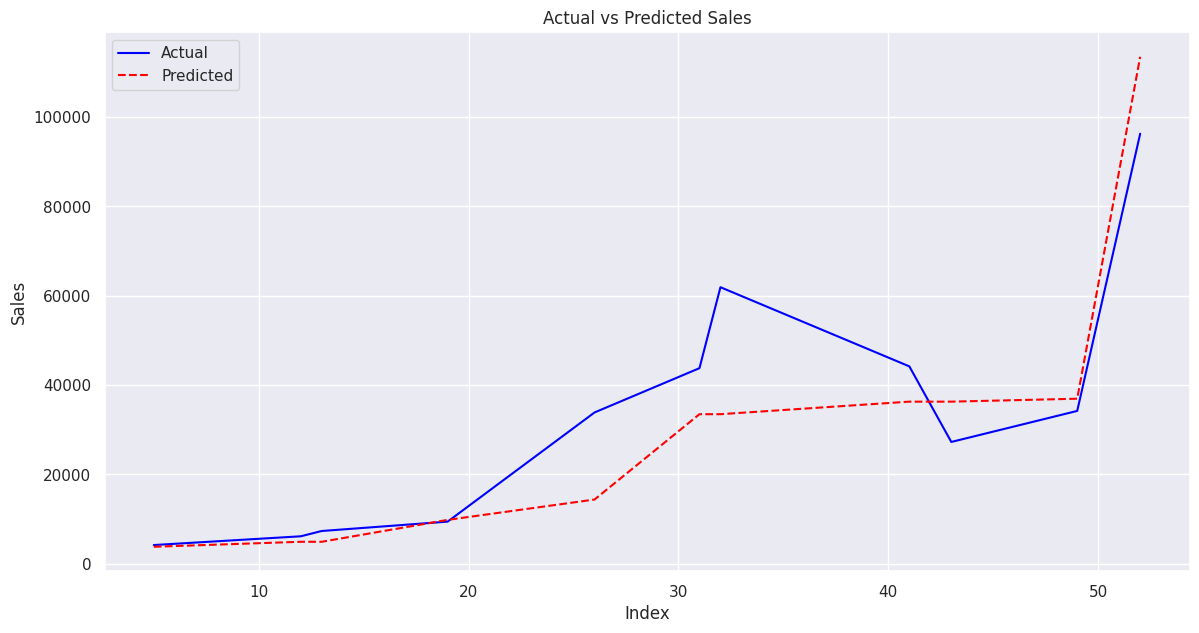

In [1594]:
# Creating a DataFrame to align the predictions with the actual sales
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
comparison_df = comparison_df.sort_index()  # Sort by index to align the predictions correctly

plt.figure(figsize=(14, 7))

# Actual values in blue
plt.plot(comparison_df.index, comparison_df['Actual'], color="blue", label="Actual")

# Predicted values in red
plt.plot(comparison_df.index, comparison_df['Predicted'], color="red", label="Predicted", linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot visualizes the actual vs. predicted sales, with the actual sales depicted in blue and the predicted in red dashes. The degree of overlap between the two lines indicates the model's prediction accuracy, with a closer overlap representing higher accuracy.

The given code snippet below creates a visualization using seaborn, a Python data visualization library.

1. `regplot` is called to generate a scatter plot with a linear regression line.
2. Inputs for the plot are the flattened arrays of actual (`y_test`) and predicted (`predictions`) prices.
3. The regression line is set to appear in red.
4. Axis labels are added for clarity: "predicted price" on the x-axis and "true price" on the y-axis.

This visualization helps in assessing the accuracy of a regression model by comparing predicted values against actual values.

<Axes: xlabel='predicted price', ylabel='true price'>

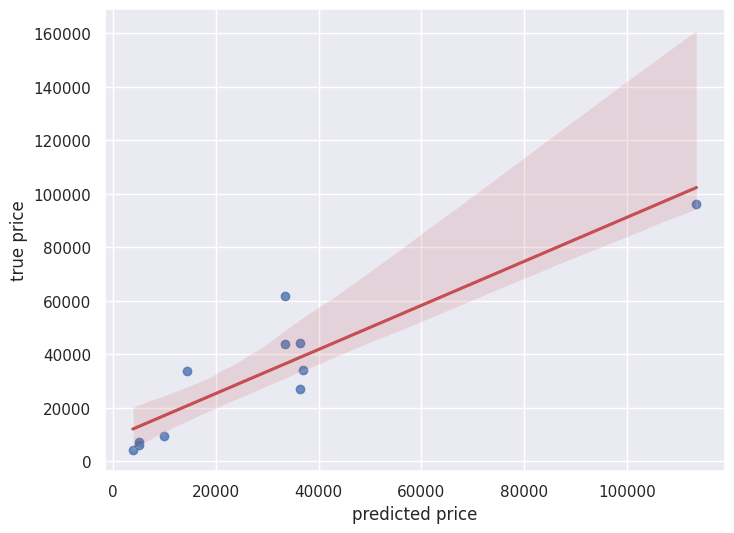

In [1595]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted price")
plot.set_ylabel("true price")
plot

The regression plot shows the correlation between predicted and actual sales. The proximity of the data points to the red line, which represents the best fit, indicates prediction accuracy. Points closely clustered around the line suggest high accuracy, while points farther from the line signal larger prediction errors.

## Random Forest Regression

Random Forest Regression is employed for time series data to leverage its strength in capturing complex, non-linear interactions and dependencies. By aggregating multiple decision trees, this ensemble method enhances prediction accuracy and robustness, especially in forecasting scenarios. The inherent randomness also helps in mitigating overfitting, a common issue with time series. With these advantages, we will harness Random Forest Regression for predicting future sales.

The code snippet demonstrates the process of using a Random Forest Regressor for machine learning tasks in Python, utilizing the `sklearn` library.

1. A `RandomForestRegressor` is initialized with 100 trees and a set random state for reproducibility.
2. The model is trained using the `fit` method with `X_train` and `y_train` data.
3. Predictions are made on the test dataset `X_test`, resulting in `y_pred_rf`.
4. Performance metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the coefficient of determination (R²), are computed using the true values `y_test` and the predicted values `y_pred_rf`.
5. These error metrics are then organized into a dictionary named `error_metrics_rf` for easy reference.

The comments in the code provide a clear understanding of each step in the machine learning pipeline, from model initialization to performance evaluation. They are sufficiently informative for someone familiar with the `sklearn` library and machine learning concepts.


In [1596]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Assemble the error metrics
error_metrics_rf = {
    'Mean Absolute Error (MAE)': mae_rf,
    'Mean Squared Error (MSE)': mse_rf,
    'Root Mean Squared Error (RMSE)': rmse_rf,
    'R-squared (R²)': r2_rf
}

error_metrics_rf


{'Mean Absolute Error (MAE)': 10771.291818181819,
 'Mean Squared Error (MSE)': 158556983.59815454,
 'Root Mean Squared Error (RMSE)': 12591.941216435,
 'R-squared (R²)': 0.7786152340694892}

The code snippet below performs the following operations:

1. Generates predictions for the test data using the trained Random Forest Regression model.
2. Constructs a DataFrame to compare the true values against the predicted values.
3. Calculates the prediction error as the absolute difference between true and predicted values, converting the error to an integer type.
4. Resets the index of the DataFrame for a clean presentation.

This organized structure allows for an easy assessment of the model's prediction accuracy on the test data.

In [1597]:
predictions = random_forest_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"].astype(int))
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

,truth,prediction,error
0,43793.0,33757.89,10035
1,4197.0,6505.43,2308
2,61916.0,46233.78,15682
3,7341.0,23018.77,15677
4,9438.0,8749.28,688
5,34223.0,49487.39,15264
6,44196.0,52644.62,8448
7,33877.0,22556.72,11320
8,27274.0,51575.02,24301
9,6155.0,16173.19,10018


The given code block below imports necessary libraries and performs the following tasks:

1. Calculates the Maximum Error (Max Error) between the actual and predicted values, and then applies the ceiling function to round it up to the nearest integer. This metric provides insight into the worst-case error in the predictions.
2. Computes the Mean Squared Error (MSE) and then the Root Mean Squared Error (RMSE), also rounding it up to the nearest integer. The RMSE gives a sense of the magnitude of error across all predictions.

These metrics are printed out, giving a quick evaluation of the model's performance on the test data in terms of its prediction errors.

In [1598]:
me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 24302
Root Mean Squared Error: 12592


The code snippet below is designed to visually compare the actual and predicted sales figures:

1. It initializes a DataFrame that juxtaposes the actual sales (`y_test`) with the predicted values (`y_pred_rf`).
2. The DataFrame is then sorted by its index to ensure the alignment of data points.
3. A matplotlib figure is created with a size of 14x7 inches for clear visualization.
4. The actual sales are plotted as a blue line, and the predicted sales are plotted as a dashed red line.
5. The plot is titled 'Actual vs Predicted Sales' and includes labels for both the x-axis (Index) and the y-axis (Sales).
6. A legend is added to differentiate between the actual and predicted lines.
7. The plot is displayed with `plt.show()`.

This visualization provides an intuitive comparison of the model's predictions against the actual sales data.

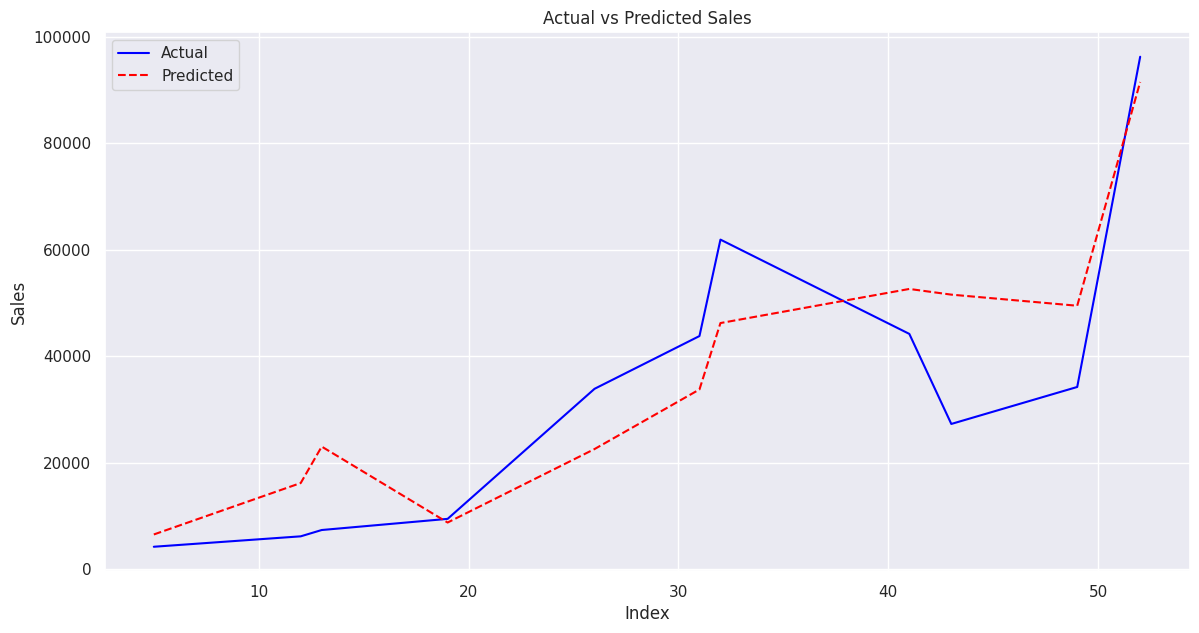

In [1599]:
# Creating a DataFrame to align the predictions with the actual sales
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_df = comparison_df.sort_index()  # Sort by index to align the predictions correctly

plt.figure(figsize=(14, 7))

# Actual values in blue
plt.plot(comparison_df.index, comparison_df['Actual'], color="blue", label="Actual")

# Predicted values in red
plt.plot(comparison_df.index, comparison_df['Predicted'], color="red", label="Predicted", linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot visualizes the actual vs. predicted sales, with the actual sales depicted in blue and the predicted in red dashes. The degree of overlap between the two lines indicates the model's prediction accuracy, with a closer overlap representing higher accuracy.

The given code snippet below creates a visualization using seaborn, a Python data visualization library.

1. `regplot` is called to generate a scatter plot with a linear regression line.
2. Inputs for the plot are the flattened arrays of actual (`y_test`) and predicted (`predictions`) prices.
3. The regression line is set to appear in red.
4. Axis labels are added for clarity: "predicted price" on the x-axis and "true price" on the y-axis.

This visualization helps in assessing the accuracy of a regression model by comparing predicted values against actual values.

<Axes: xlabel='predicted price', ylabel='true price'>

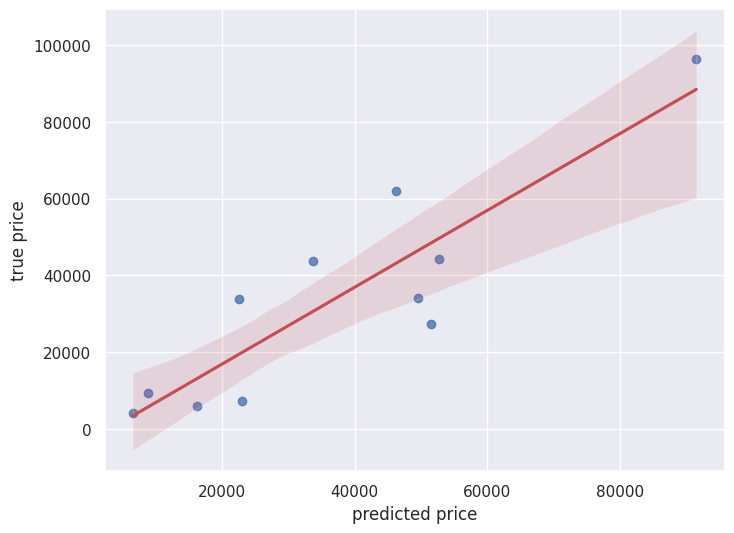

In [1600]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted price")
plot.set_ylabel("true price")
plot

The regression plot shows the correlation between predicted and actual sales. The proximity of the data points to the red line, which represents the best fit, indicates prediction accuracy. Points closely clustered around the line suggest high accuracy, while points farther from the line signal larger prediction errors.

## Prophet

Facebook Prophet is a forecasting tool designed for handling the intricacies of time series data that traditional forecasting methods might struggle with. It is particularly adept at managing seasonal effects, missing data, and changes in trends by incorporating an additive model where non-linear trends fit with yearly, weekly, and daily seasonality, plus holiday effects. Prophet is robust to outliers and shifts in the trend, and it can automatically detect these changes with its change point detection capability. This flexibility makes it an excellent choice for businesses to forecast metrics like sales and web traffic where these conditions are common. With these features, Prophet stands out as a go-to model for generating reliable future forecasts in various applications.

The code snippet below demonstrates the initial data preparation required for time series forecasting with the Facebook Prophet model in Python.

1. The `Prophet` class is imported from the `prophet` library, which is designed for forecasting time series data.
2. A dataset named `DataSet.csv` is loaded into a pandas DataFrame `df` using the `read_csv` function.
3. The DataFrame columns are renamed to 'ds' for the date column and 'y' for the target variable, following the Prophet model's naming convention.
4. The 'ds' column is converted to datetime format using pandas' `to_datetime` function, ensuring that the Prophet model can correctly interpret the date information.

The comments within the code offer a clear explanation of each step necessary to prepare the data for forecasting, tailored for users with knowledge of Python's data handling libraries and the Prophet model.


In [1601]:
from prophet import Prophet
df = pd.read_csv("DataSet.csv")

# Rename the columns to fit Prophet's requirements
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Convert the 'ds' column to datetime if it's not already
df['ds'] = pd.to_datetime(df['ds'])

The code snippet below demonstrates the process of splitting a dataset into training and testing sets for model training and evaluation, using Python's `sklearn` library.

1. The `train_test_split` function from the `sklearn.model_selection` module is used to divide the DataFrame `df` into two subsets.
2. The `test_size=0.2` parameter specifies that 20% of the data will be set aside for testing the model's performance.
3. The `shuffle=False` parameter ensures that the splitting preserves the order of the data, which is important for time series analysis where the sequence of data points is significant.

This step is crucial in the machine learning workflow as it prepares separate datasets for training and validating the model, enabling an assessment of the model's predictive capabilities on unseen data.


In [1602]:
train, test = train_test_split(df, test_size=0.2, shuffle=False)

The code snippet below demonstrates the steps of initializing and configuring a Facebook Prophet model for time series forecasting with additional regressors in Python.

1. A new `Prophet` model instance is created and stored in the variable `model`.
2. Additional regressors 'Inflation', 'Unemployment', and 'Temperature' are added to the model using the `add_regressor` method. This allows the model to account for the potential impact of these external factors on the forecast.
3. The model is then trained on the `train` dataset using the `fit` method, which adjusts the model parameters to the historical data.

These steps prepare the Prophet model to make future predictions by incorporating not just the time series data but also external variables that could influence the trend and seasonality in the forecasted data.


In [1603]:
# Initialize the Prophet model
model = Prophet()

# Before fitting the model, add the additional regressors
model.add_regressor("Inflation")
model.add_regressor("Unemployment")
model.add_regressor("Temperature")

# Fit the model with your dataframe
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


The code snippet below demonstrates how to prepare future data points for forecasting with the Facebook Prophet model that includes additional regressors.

1. The `make_future_dataframe` method from the Prophet model instance is used to create a new DataFrame `future` that extends into the future for a length equal to the size of the `test` dataset, with a daily frequency (`freq='D'`).
2. The `future` DataFrame is then augmented with the external regressors 'Inflation', 'Unemployment', and 'Temperature' by assigning the corresponding values from the original DataFrame `df`.

This process is essential for making forecasts with Prophet when the model has been extended to include additional regressors. It ensures that the future DataFrame not only contains the future dates for the forecast but also the values of the external factors that are expected to influence the forecast.


In [1604]:
import numpy as np

future = model.make_future_dataframe(periods=len(test), freq='D')

future['Inflation'] = df['Inflation']
future['Unemployment'] = df['Unemployment']
future['Temperature'] = df['Temperature']

The code snippet below demonstrates the forecasting and evaluation process using the Facebook Prophet model in Python.

1. The `prophet.diagnostics` module is imported to access functions for cross-validation and performance metrics, although they are not directly used in the snippet.
2. The `model.predict` method is called on the `future` DataFrame to generate forecasts, which are stored in the `forecast` DataFrame.
3. The predictions for the test set are extracted by taking the last `n` rows from the `forecast` DataFrame, where `n` is the length of the `test` set, focusing on the 'yhat' column that contains the predicted values.
4. Error metrics, specifically Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE), are calculated by comparing the test set's actual values with the predicted values.
5. The computed error metrics are then printed out to provide a quantitative evaluation of the model's performance.

This evaluation process is crucial for understanding the accuracy of the model's predictions and determining how well the model may perform on real-world data.


In [1605]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Use the model to make predictions
forecast = model.predict(future)

# Evaluate predictions
# Extract the predicted values for the test set dates
predictions = forecast[-len(test):]['yhat']

# Calculate error metrics
mae = (test['y'] - predictions).abs().mean()
rmse = ((test['y'] - predictions) ** 2).mean() ** 0.5
mape = (test['y'] - predictions).abs() / test['y']

# Print error metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape.mean()}')

MAE: 37745.04655548285
RMSE: 48116.7737231036
MAPE: 0.4506227722856033


The code snippet below provides a visual comparison between actual and predicted sales using the matplotlib library in Python.

1. A new figure with a specified size is created for plotting.
2. The actual sales from the `test` dataset are plotted as a line chart, using the 'ds' column for the dates on the x-axis and the 'y' column for sales on the y-axis, labeled as 'Actual Sales'.
3. The predicted sales, stored in the `predictions` variable, are plotted on the same graph for direct comparison, labeled as 'Predicted Sales'.
4. Both the x-axis and y-axis are labeled as 'Date' and 'Sales', respectively, and a title 'Actual vs Predicted Sales' is added to the chart.
5. A legend is included to help distinguish between the actual and predicted sales lines.
6. Finally, the `plt.show()` function is called to display the resulting plot.

This visualization step is an integral part of the analysis, providing a clear and intuitive way to assess the model's performance by comparing its predictions against the actual sales data.


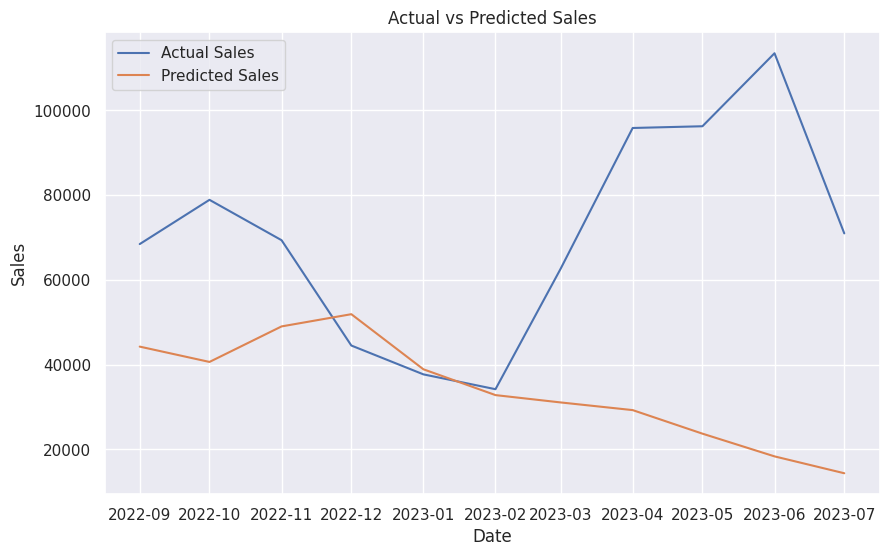

In [1606]:
# Plot actual sales
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales')

# Plot predicted sales
plt.plot(test['ds'], predictions, label='Predicted Sales')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Display the plot
plt.show()

# Why Confusion Matrices Are Not Applicable to Regression Models

## Continuous vs. Discrete Outputs
- **Classification**: Produces discrete categories (e.g., spam or not spam).
- **Regression**: Predicts continuous values (e.g., predicting a house's price).

**Example**:
For a classification model predicting emails as spam or not spam, a confusion matrix can be used:

| Actual \ Predicted | Spam | Not Spam |
|--------------------|------|----------|
| Spam               | 50   | 5        |
| Not Spam           | 10   | 100      |

However, for regression predicting house prices, the output is continuous and a confusion matrix is not suitable. Instead, we compare predicted and actual values directly:

| House | Actual Price | Predicted Price | Error  |
|-------|--------------|-----------------|--------|
| A     | $300,000     | $295,000        | $5,000 |
| B     | $450,000     | $460,000        | $10,000|

## Evaluation Metrics
- **Classification**: Uses metrics like Accuracy and F1-Score, which need discrete class labels.
- **Regression**: Uses metrics like MSE and RMSE, which measure how close the predicted values are to the actual numerical values.

**Example**: The concept of "accuracy" doesn't translate to regression, where we care about how close the predicted price is to the actual price, not whether it falls into a binary category.

## Nature of Errors
- **Classification**: Errors are misclassifications, captured as false positives/negatives.
- **Regression**: Errors are deviations in predicted values, measured on a continuous scale.

**Example**: If a house's actual price is $300,000 and the model predicts $295,000, there's no "false positive" or "false negative," just a $5,000 prediction error.

## Decision Boundaries
- **Classification**: Has clear decision boundaries for categories.
- **Regression**: No boundaries, since outputs are not categorical; the predicted value is on a continuum.

**Example**: There's no threshold in regression that separates a "positive" from a "negative" prediction, unlike in classification.

## Assumptions of Output
- **Classification**: Assumes binary or multi-class outputs with true/false assessment.
- **Regression**: Assumes a continuous relationship and outputs, which do not fit into true/false categories.

**Example**: Predicting the temperature for the next day is a regression task. There's no "correct class" for the temperature; it's a value that needs to be as close to the actual temperature as possible.

In conclusion, confusion matrices are not applicable to regression models because they rely on discrete category outcomes to tabulate correct and incorrect predictions, which does not align with the continuous nature of regression predictions.

